<a href="https://colab.research.google.com/github/Anishgoswamicode/wikipedia-semantic-clustering/blob/main/wiki_semantic_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q wikipedia
!pip install -q sentence-transformers umap-learn keybert


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.3 MB/s eta 0:00:00


In [2]:
import wikipedia
import random

# Choose categories to pull summaries from
topics = ["Artificial intelligence", "Philosophy", "Genetics", "Climate change", "World War II", "Blockchain", "Economics", "Quantum mechanics", "Indian History", "Linguistics"]

summaries = []
labels = []

for topic in topics:
    try:
        related_pages = wikipedia.search(topic, results=100)
        for title in related_pages:
            try:
                summary = wikipedia.summary(title)
                summaries.append(summary)
                labels.append(topic)
            except Exception:
                continue
    except Exception:
        continue

print(f"Total articles collected: {len(summaries)}")


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave diff

Total articles collected: 896


In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(summaries, show_progress_bar=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

In [4]:
import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(embeddings)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=3)
cluster_labels = dbscan.fit_predict(embedding_2d)

print(f"Clusters found: {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)}")


Clusters found: 10


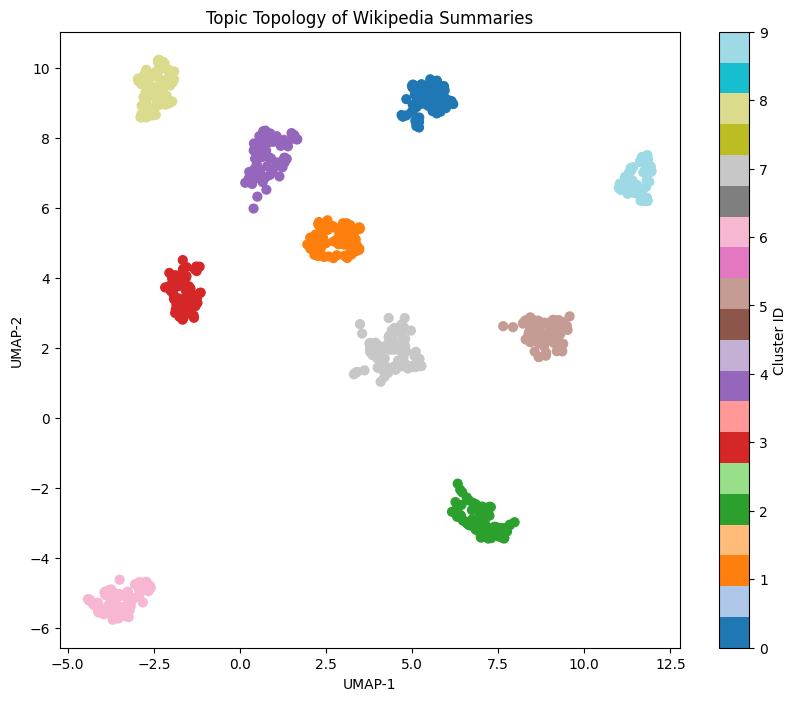

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, cmap='tab20', s=40)
plt.title("Topic Topology of Wikipedia Summaries")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(label="Cluster ID")
plt.show()


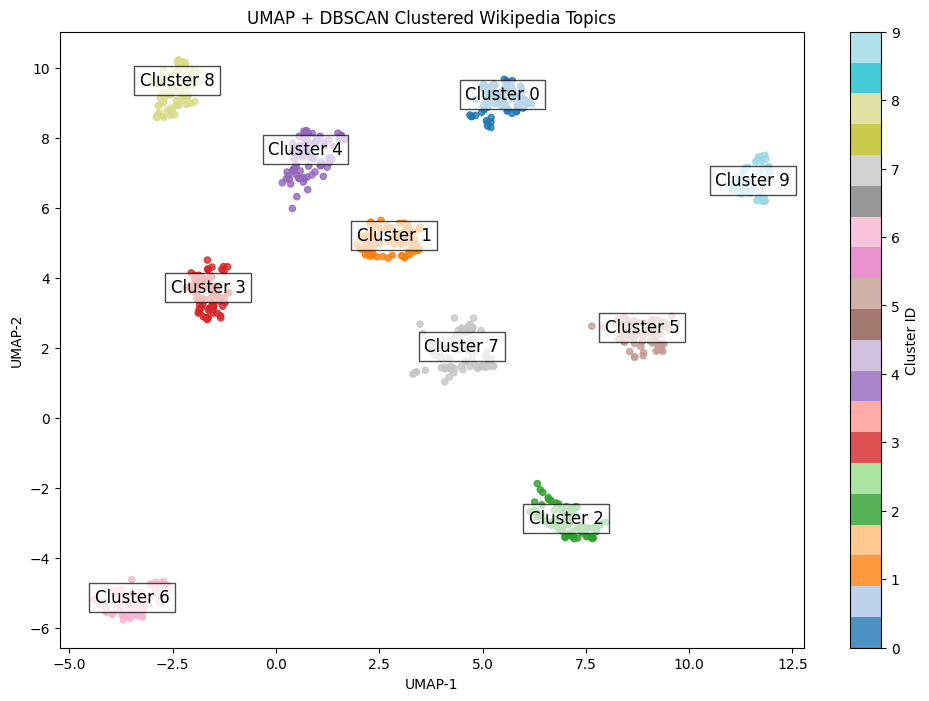

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assume:
# - embedding_2d is your UMAP result (shape: [N, 2])
# - cluster_labels is your DBSCAN result (shape: [N])

plt.figure(figsize=(12, 8))

# Scatter plot
scatter = plt.scatter(
    embedding_2d[:, 0],
    embedding_2d[:, 1],
    c=cluster_labels,
    cmap='tab20',
    s=20,
    alpha=0.8
)

# Plot title and labels
plt.title("UMAP + DBSCAN Clustered Wikipedia Topics")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

# Label each cluster with its number at the median location
unique_clusters = np.unique(cluster_labels)
for cluster_id in unique_clusters:
    if cluster_id == -1:
        continue  # skip noise

    # Find the points in this cluster
    cluster_points = embedding_2d[cluster_labels == cluster_id]

    # Compute median position
    median_x, median_y = np.median(cluster_points, axis=0)

    # Plot cluster label at median
    plt.text(median_x, median_y, f"Cluster {cluster_id}", fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7), ha='center')

plt.colorbar(scatter, label="Cluster ID")
plt.show()


In [8]:
from keybert import KeyBERT
from collections import defaultdict

kw_model = KeyBERT(model)

cluster_to_summaries = defaultdict(list)
for i, label in enumerate(cluster_labels):
    if label == -1:
        continue  # skip noise
    cluster_to_summaries[label].append(summaries[i])

# Print top keywords for each cluster
for cluster_id, cluster_texts in cluster_to_summaries.items():
    joined = " ".join(cluster_texts[:10])
    keywords = kw_model.extract_keywords(joined, top_n=5)
    print(f"\n🔹 Cluster {cluster_id}:")
    for kw in keywords:
        print(f" - {kw[0]} ({kw[1]:.2f})")



🔹 Cluster 0:
 - ai (0.63)
 - intelligence (0.46)
 - google (0.36)
 - autonomous (0.36)
 - intelligent (0.35)

🔹 Cluster 1:
 - reflection (0.56)
 - fluent (0.33)
 - linguistic (0.32)
 - fluents (0.31)
 - semantics (0.29)

🔹 Cluster 2:
 - warming (0.49)
 - climate (0.44)
 - co2 (0.41)
 - emissions (0.39)
 - carbon (0.35)

🔹 Cluster 3:
 - informatics (0.56)
 - computing (0.40)
 - diagnosis (0.40)
 - unix (0.40)
 - law (0.37)

🔹 Cluster 4:
 - philosophy (0.62)
 - philosophical (0.52)
 - philosopher (0.49)
 - philosophers (0.49)
 - philosophies (0.44)

🔹 Cluster 5:
 - philosophy (0.43)
 - morality (0.41)
 - maxims (0.41)
 - maxim (0.40)
 - maximizing (0.39)

🔹 Cluster 6:
 - biology (0.57)
 - biological (0.52)
 - genetics (0.50)
 - genes (0.49)
 - genetic (0.48)

🔹 Cluster 7:
 - levantines (0.54)
 - palestinians (0.53)
 - palestinian (0.51)
 - palestine (0.50)
 - levant (0.50)

🔹 Cluster 8:
 - quantum (0.61)
 - schrödinger (0.45)
 - macroscopic (0.39)
 - physicist (0.39)
 - atoms (0.38)

🔹 